Intro: Topological Approach to Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from ripser import ripser, Rips
from persim import plot_diagrams
from sklearn.datasets import make_circles, make_blobs, make_moons, load_wine, load_breast_cancer, load_iris
import random

(0.0, 1.0, 0.0, 1.0)

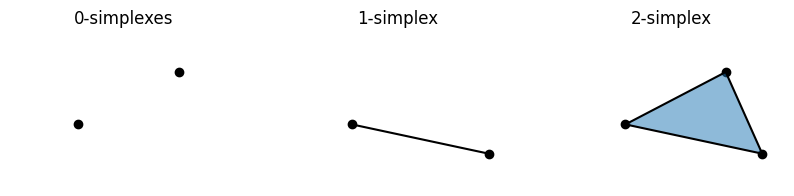

In [2]:
x, y= [.3, .9, .74, .76], [.4, .21, .74, .18]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(10,2))

ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.scatter([x[0], x[2]], [y[0], y[2]], c='black')
ax1.title.set_text('0-simplexes')
ax1.axis('off')

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.scatter(x[:2], y[:2], c='black')
ax2.plot([x[0], x[1]],[y[0], y[1]], c='black')
ax2.title.set_text('1-simplex')
ax2.axis('off')

ax3.set_xlim([0, 1])
ax3.set_ylim([0, 1])
ax3.scatter(x[:3], y[:3], c='black')
ax3.plot([x[0],x[1]],[y[0],y[1]], c='black')
ax3.plot([x[1],x[2]],[y[1],y[2]], c='black')
ax3.plot([x[0],x[2]],[y[0],y[2]], c='black')
ax3.fill_between([x[2], x[0], x[1], x[2]], [y[2], y[0], y[1], y[2]], alpha=.5)
ax3.title.set_text('2-simplex')
ax3.axis('off')

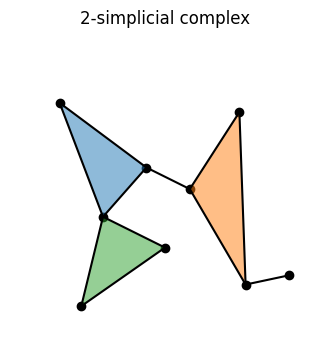

In [3]:
x, y= [.3, .9, .74, .76, .23, .44, .16, .58, .5], [.4, .21, .74, .18, .11, .56, .77, .49, .3]
fig, ax = plt.subplots(1, figsize=(4, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.scatter(x, y, c='black')
ax.plot([x[0],x[6]],[y[0],y[6]], c='black')
ax.plot([x[0],x[5]],[y[0],y[5]], c='black')
ax.plot([x[6],x[5]],[y[6],y[5]], c='black')
ax.fill_between([x[0], x[6], x[5], x[0]], [y[0], y[6], y[5], y[0]], alpha=.5)
ax.plot([x[4],x[0]],[y[4],y[0]], c='black')
ax.plot([x[7],x[5]],[y[7],y[5]], c='black')
ax.plot([x[7],x[2]],[y[7],y[2]], c='black')
ax.plot([x[7],x[3]],[y[7],y[3]], c='black')
ax.plot([x[2],x[3]],[y[2],y[3]], c='black')
ax.fill_between([x[7], x[3], x[2], x[7]], [y[7], y[3], y[2], y[7]], alpha=.5)
ax.plot([x[1],x[3]],[y[1],y[3]], c='black')
ax.plot([x[0],x[8]],[y[0],y[8]], c='black')
ax.plot([x[4],x[8]],[y[4],y[8]], c='black')
ax.fill_between([x[0], x[8], x[4], x[0]], [y[0], y[8], y[4], y[0]], alpha=.5)
ax.axis('off')
ax.title.set_text('2-simplicial complex')

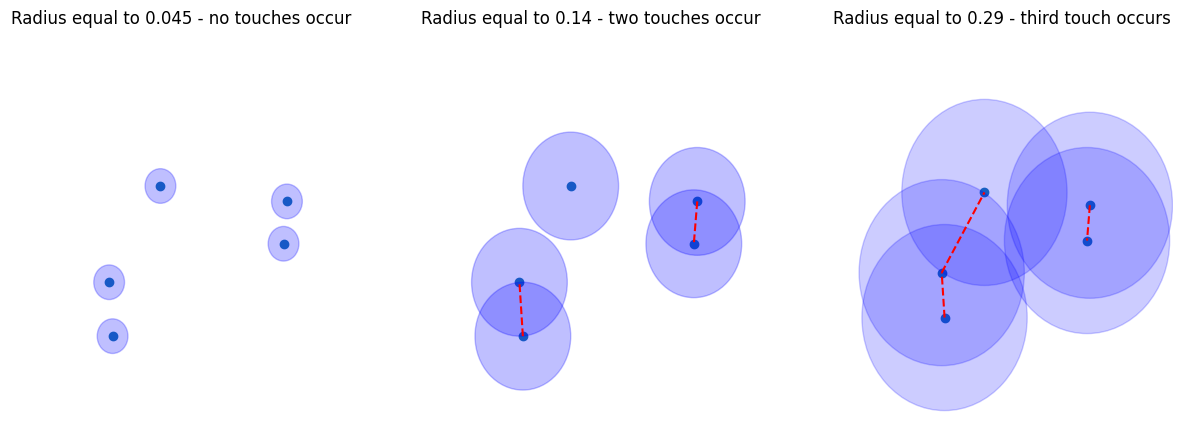

In [4]:
x, y = [.3, .29, .44, .81, .8], [.21, .35, .6, .56, .45]

def line_ax2(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    ax2.plot([x1,x2],[y1,y2],'r--')

def line_ax3(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    ax3.plot([x1,x2],[y1,y2],'r--')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.scatter(x, y)
ax1.title.set_text('Radius equal to 0.045 - no touches occur')
ax1.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), .045 , color='b', fill=True, alpha=.25)
    ax1.add_artist(ball_2d)

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.scatter(x, y)
line_ax2(x,y,0,1)
line_ax2(x,y,3,4)
ax2.title.set_text('Radius equal to 0.14 - two touches occur')
ax2.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), .14 , color='b', fill=True, alpha=.25)
    ax2.add_artist(ball_2d)

ax3.set_xlim([-.1, 1.1])
ax3.set_ylim([-.1, 1.1])
ax3.scatter(x, y)
line_ax3(x,y,0,1)
line_ax3(x,y,1,2)
#line_ax3(x,y,0,2)
line_ax3(x,y,3,4)
ax3.title.set_text('Radius equal to 0.29 - third touch occurs')
ax3.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), 0.29 , color='b', fill=True, alpha=.2)
    ax3.add_artist(ball_2d)

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)

One can find precise points, where each connected component starts/dies:

 [[0.         0.11045361]
 [0.         0.14035669]
 [0.         0.2915476 ]
 [0.         0.37215587]
 [0.                inf]]


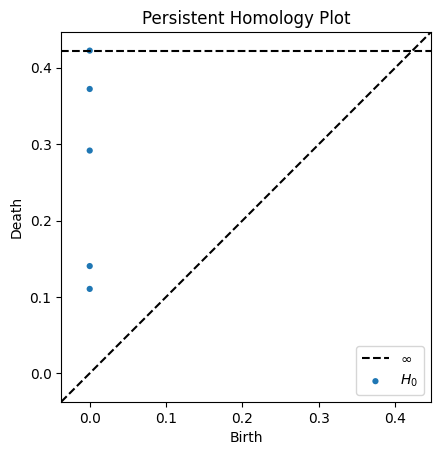

In [5]:
data = np.array([x, y]).T
rips = Rips(maxdim=0)
dgms = rips.fit_transform(data)
#dgms = ripser(data, maxdim=0)['dgms']
print('\nOne can find precise points, where each connected component starts/dies:\n\n', dgms[0])   
plt.title('Persistent Homology Plot')
rips.plot(dgms, show=True)
plt.show() 

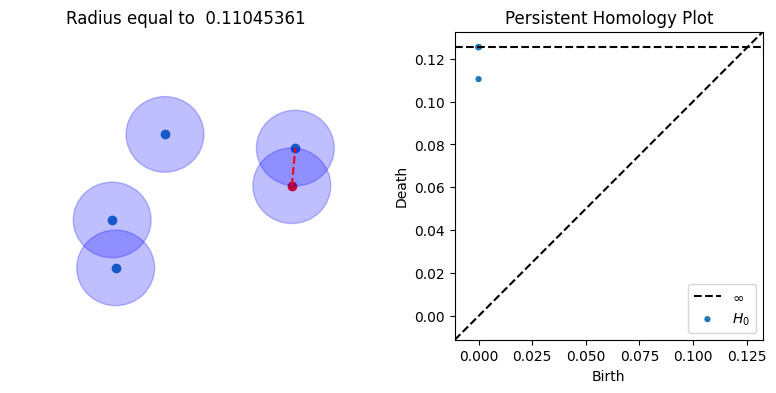

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_xlim([0, 1])
ax1.set_ylim([0, .9])
ax1.scatter(x[:4], y[:4])
ax1.scatter(x[4], y[4], c='r')
ax1.plot([x[4],x[3]],[y[4],y[3]],'r--')
ax1.title.set_text('Radius equal to  0.11045361')
ax1.axis('off')
for i in range(len(x)):
    ball_2d = plt.Circle((x[i], y[i]), dgms[0][0][1] , color='b', fill=True, alpha=.25)
    ax1.add_artist(ball_2d)
dgms = ripser(data, maxdim=0, thresh=.14)['dgms']
plt.title('Persistent Homology Plot')
plot_diagrams(dgms, show=True)
plt.show()

C:\Users\jcf_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:2061: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 1] *= sx
C:\Users\jcf_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:2062: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 2] *= sx
C:\Users\jcf_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:2063: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[1, 0] *= sy
C:\Users\jcf_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:2065: RuntimeWarning: invalid value encountered in scalar multiply
  se

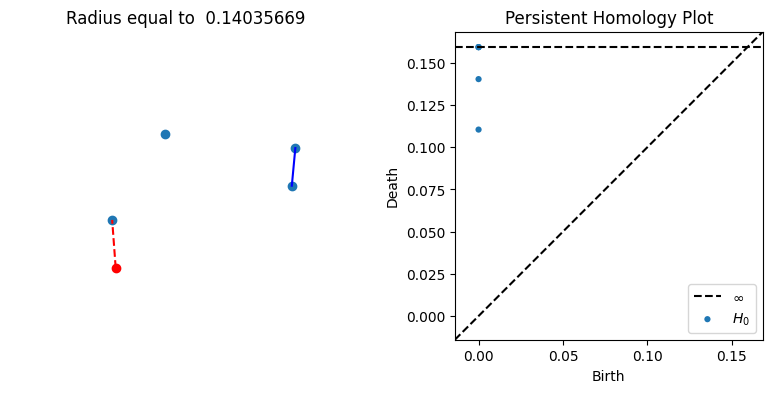

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_xlim([0, 1])
ax1.set_ylim([0, .9])
ax1.scatter(x[1:], y[1:])
ax1.scatter(x[0], y[0], c='r')
ax1.plot([x[4],x[3]],[y[4],y[3]],'b-')
ax1.plot([x[0],x[1]],[y[0],y[1]],'r--')
ax1.title.set_text('Radius equal to  0.14035669')
ax1.axis('off')
for i in range(len(x)):
    ball_ax1 = plt.Circle((x[i], y[i]), dgms[0][1][1] , color='b', fill=True, alpha=.25)
    ax1.add_artist(ball_ax1)   
dgms = ripser(data, maxdim=0, thresh=.15)['dgms']
plt.title('Persistent Homology Plot')
plot_diagrams(dgms, show=True)
plt.show()

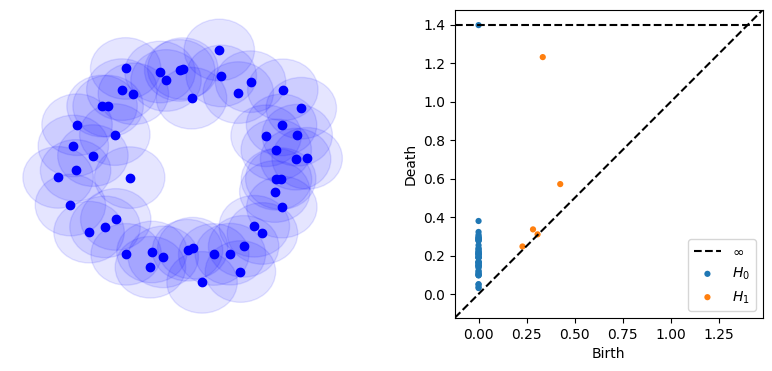

In [8]:
data, labels = make_circles(n_samples=50, shuffle=True, noise=.1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.scatter(data[:,0], data[:,1], c='b')
ax1.axis('off')
for i in range(len(data)):
    ball_2d = plt.Circle((data[i,0], data[i,1]), .3  , color='b', fill=True, alpha=.1)
    ax1.add_artist(ball_2d)
    
dgms = ripser(data, maxdim=1)['dgms']
plot_diagrams(dgms, show=True)
plt.show()

ref: https://www.kaggle.com/code/mikolajbabula/topological-approach-to-clustering

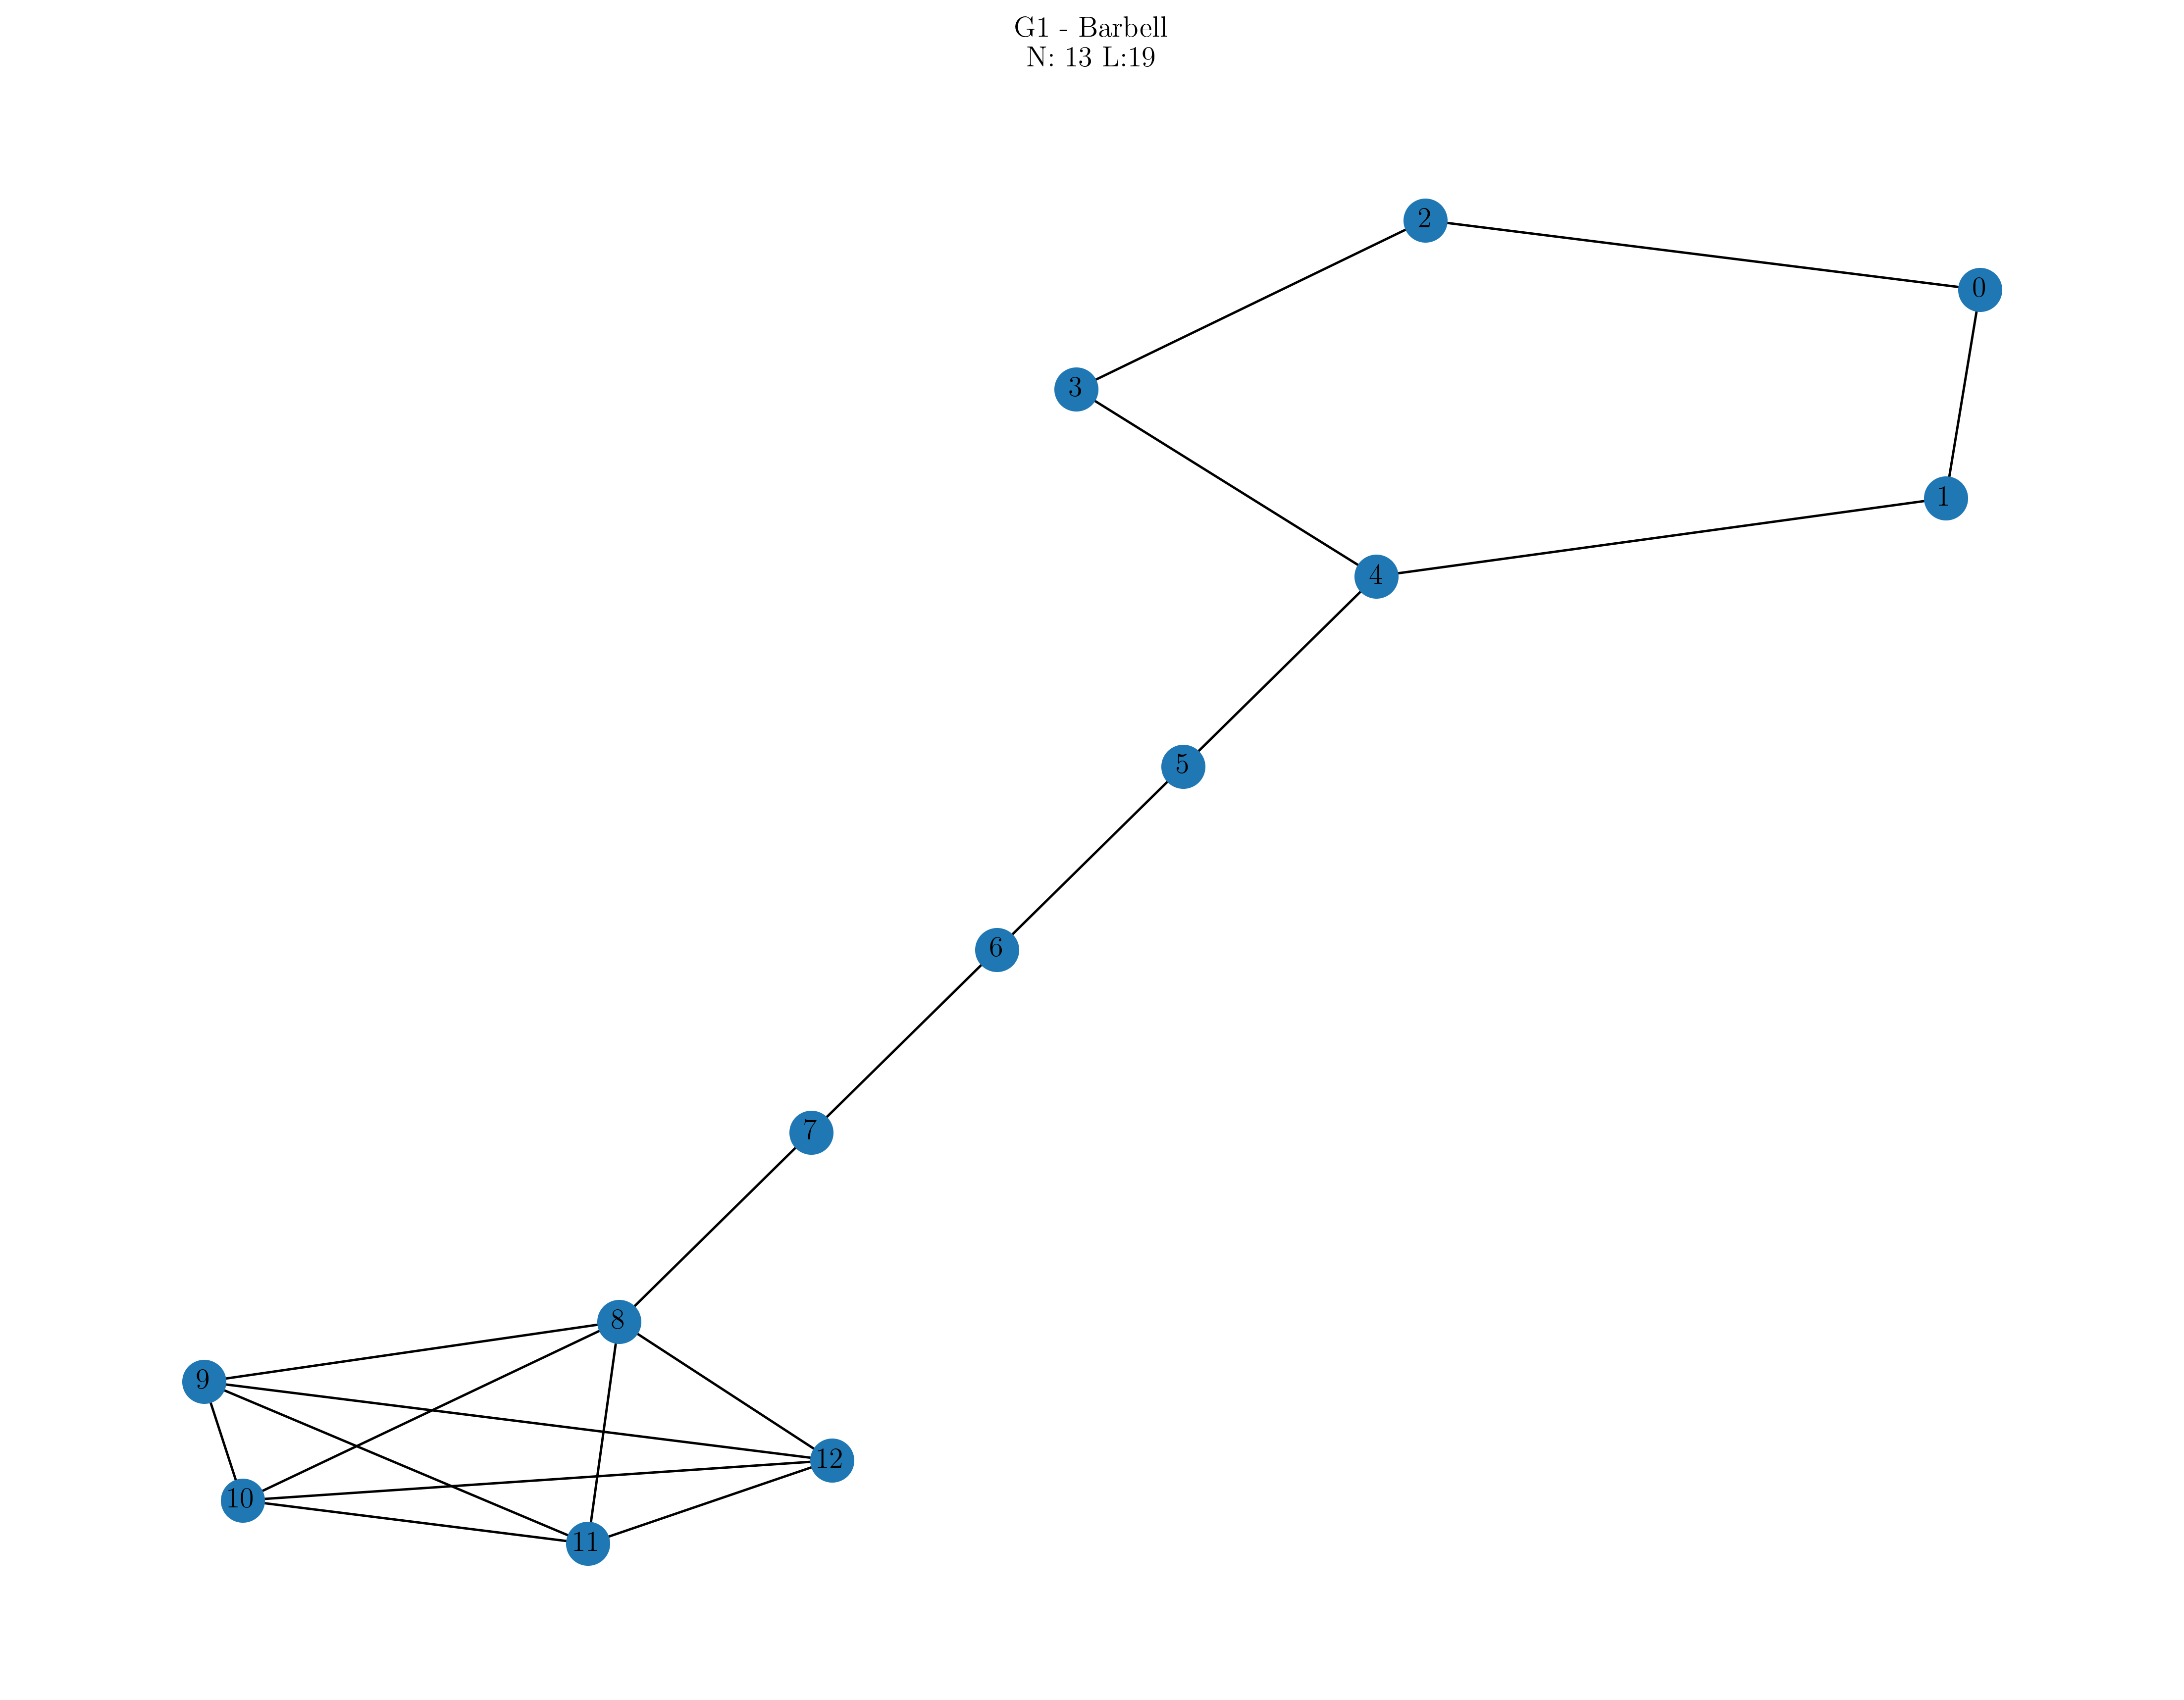

<Figure size 2800x5600 with 0 Axes>

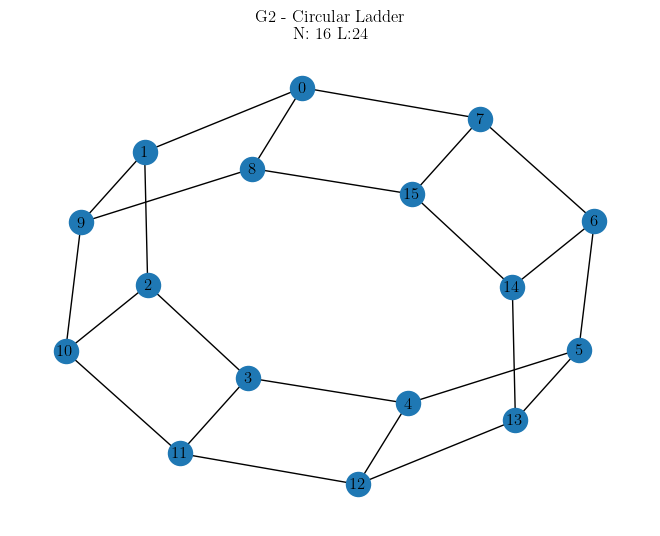

<Figure size 2800x5600 with 0 Axes>

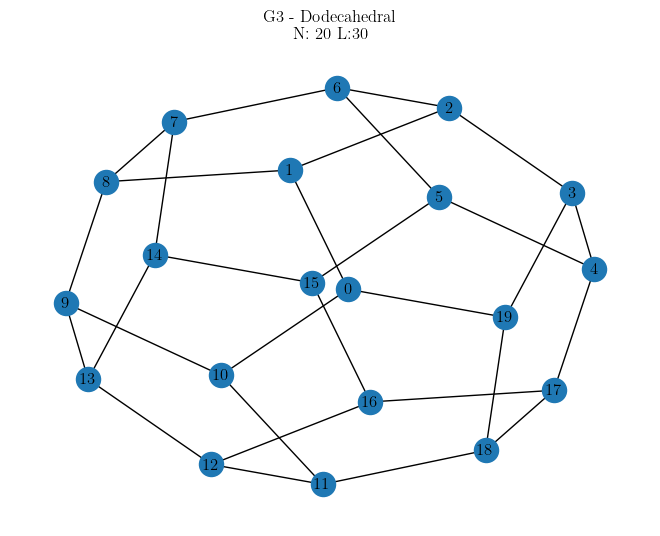

<Figure size 2800x5600 with 0 Axes>

In [14]:
G1 = nx.barbell_graph(5,3)
G1.remove_edges_from([(2,4),(3,1),(1,2),(3,0),(0,4)])
G1.name='G1 - Barbell'
plt.figure(figsize=(16,12),dpi=350)
plt.title(G1.name+'\nN: '+str(G1.number_of_nodes())+' L:'+str(G1.number_of_edges()))
nx.draw_kamada_kawai(G1,with_labels=True)
plt.figure(figsize=(8,16),dpi=350)
plt.show()

G2 = nx.generators.circular_ladder_graph(8)
G2.name='G2 - Circular Ladder'
nx.draw_kamada_kawai(G2,with_labels=True)
plt.title(G2.name+'\nN: '+str(G2.number_of_nodes())+' L:'+str(G2.number_of_edges()))
plt.figure(figsize=(8,16),dpi=350)
plt.show()

G3 = nx.generators.dodecahedral_graph()
G3.name='G3 - Dodecahedral'
nx.draw_kamada_kawai(G3,with_labels=True)
plt.title(G3.name+'\nN: '+str(G3.number_of_nodes())+' L:'+str(G3.number_of_edges()))
plt.figure(figsize=(8,16),dpi=350)
plt.show()

In [10]:
from sklearn.manifold import MDS

distanceMatrixs={}

for G in [G1, G2, G3]:
    distanceMatrixs[G.name]=pd.DataFrame(dict(nx.shortest_path_length(G))).sort_index()
        
distanceMatrixsMDS={}
n_components=4
for name in distanceMatrixs:
    try:
        embedding = MDS(n_components = n_components, dissimilarity = 'precomputed', normalized_stress='auto')
        distanceMatrixsMDS[name] = embedding.fit_transform(distanceMatrixs[name])
    except Exception as e:
        print(f"Error occurred during MDS embedding for {name}: {e}")

<Figure size 2800x5600 with 0 Axes>

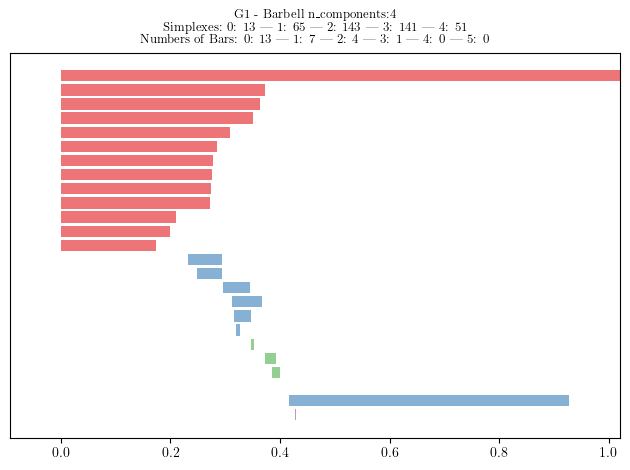

<Figure size 2800x5600 with 0 Axes>

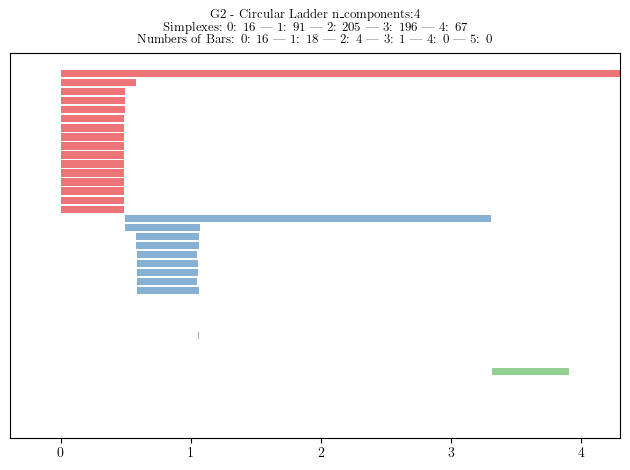

<Figure size 2800x5600 with 0 Axes>

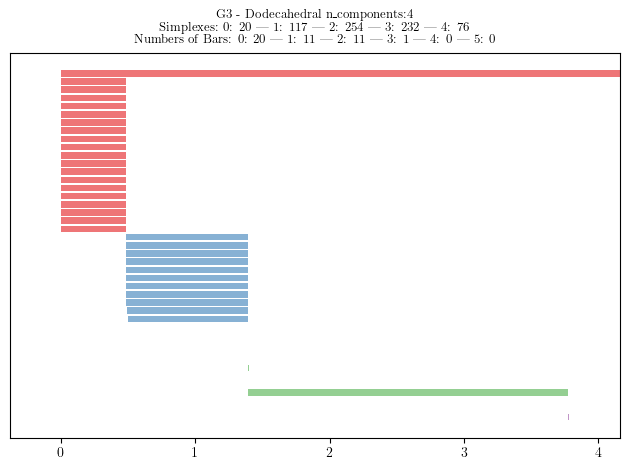

In [11]:
import gudhi as gd  

dim=5 #max dimension # HUGE impact on time complexity
simplexTrees={}
barCodes={}
for G in [G1,G2,G3]:
    alpha_complex = gd.AlphaComplex(
        points = distanceMatrixsMDS[G.name]
    ) 
    

    Alpha_simplex_tree = alpha_complex.create_simplex_tree()
    simplexTrees[G.name]=Alpha_simplex_tree
    
    BarCode = Alpha_simplex_tree.persistence()
    barCodes[G.name]=BarCode

    plt.figure(figsize=(8,16),dpi=350)
    gd.plot_persistence_barcode(BarCode);    
    
    #----Simplexes Resume
    simplexesLen={}
    for simplex,filtration in Alpha_simplex_tree.get_filtration():
        if(len(simplex)-1 not in simplexesLen):
            simplexesLen[len(simplex)-1]=1
        else:
            simplexesLen[len(simplex)-1]+=1    

    simplexesResume=''
    for item in simplexesLen.items():
        simplexesResume+=str(item[0])+': '+str(item[1])+' | '
    simplexesResume[0:-3]  
    
    #----Barcode Resume
    
    dimensionsLen={}
    for dim in range(0,dim+1):
        dimensionsLen[dim]=len([bd for bd in BarCode if (bd[0]==dim)])

    dimensionResume=''
    for item in dimensionsLen.items():
        dimensionResume+=str(item[0])+': '+str(item[1])+' | '
    dimensionResume[0:-3]    
            
    #--Plot
    
    plt.title(G.name+' n_components:'+str(n_components)+'\n Simplexes: '+simplexesResume[0:-3]+'\n Numbers of Bars: '+dimensionResume[0:-3],fontsize=9)
    plt.tight_layout()
    #plt.savefig('./imgs/PH - '+G.name,dpi=500)
    plt.show()